# Feedback from previous weeks and other and hints

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Keep the file names when saving to GitHub. It's always possible to go back to a previous version, you are not losing anything.
3. Run all the cells before saving to GitHub so the output is saved.
4. Graphs without labels (or units when appropriate) are not worth any point.
5. Do put in sufficient explanatory comments in your code.

For this week you can use these imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Introduction

In this worksheet we’ll have a further look at `curve_fit()`, in particular in the presence of noisy data.

We will look at simulating the analysis of a continuous gravitational-wave signal from deformed Neutron Stars of the kind analysed in [this paper](https://arxiv.org/pdf/2107.00600.pdf). While we will use a simplified signal, those objects do emit sinusoidal gravitational waves.

To illustrate the effect of the noise, it can be helpful to make animation. Look at the snippet bellow, you will have to tranform it for some of the exercises.

In [2]:
# Some imports for animating.
from matplotlib.animation import FuncAnimation
from IPython import display # This is specific to IPython, upon which jupyter notebooks are built.

In [3]:
# Creating an empty figure
fig = plt.figure()
ax = plt.axes()

# Initialisation of the plot element `line` as empty:
line, = ax.plot([],label='data',color='red')
# We could in general have more than one plot element.

x=np.linspace(0,2*np.pi,100)

# Setting axes so they don't move from frame to frame
ax.set_xlim(0,2*np.pi)
ax.set_ylim(-1.1,1.1)

# The anination function, which gets run for each frame, with a 
# different frame number. It has to accept as input a single 
# frame number, and replace the data for each frame number
def animate(frame_num):
    
    # This function updated the data of the line element.
    # In this example we have a sine wave, but this could
    # be anything that depends on the frame number.
    line.set_data(x,np.sin(x+frame_num/100))
    return line

# Animation function, for `frames` number of frame, with `interval` ms
# between frames.
anim=FuncAnimation(fig,animate,frames=100, interval=20)     

# And display
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close() 

# Exercises
This must be marked before you leave the lab. Mark weighting is in brackets.
**Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 0

See the bottom of the worksheet for Exercise 0, solved on video available on LearningCentral.

## Exercise 1

1. [2] Write a function that returns a sinusoid signal, in the form that can be used by curve_fit(). It should take as input an array of time values, and be parametrised by an amplitude, a frequency and a phase. You should be able to reuse the function you wrote for Exercise 1 in week 2.

    Plot the resulting signal from calling that function with unit amplitude, unit frequency, zero phase over an array of time from 0 to 10, with at least 100 points. In this example, we are using arbitrary units where all the quantities become numbers close to 1. This is a common technique to avoid large dynamic ranges in the numbers used by the program.

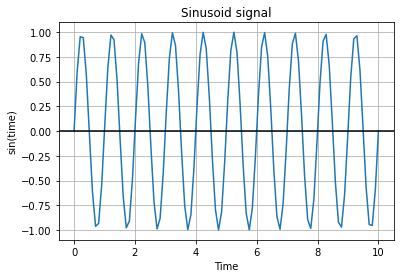

In [55]:
#define function
def sine_wave(time, amplitude=1, frequency=1, phase=0):
  return amplitude*np.sin(frequency*time*2*np.pi+phase)
#create array of time values
t = np.linspace(0,10,100)
#input values to function
f = sine_wave(t,1,1,0)
#plot wave
plt.plot(t,f)
plt.title('Sinusoid signal')
plt.xlabel('Time')
plt.ylabel('sin(time)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

2. [2] The signal from 1) with unit amplitude, unit frequency and zero phase will be our reference signal. We are now trying to see how much noise can be added until we have troubles recovering it. This could for instance help set an experiment's requirement.

    Create a function that returns random Gaussian noise, centered around zero, and with the same number of points as in an array of time values. The function should take as input the standard deviation of the noise, and something to tell how many points are needed: either 1) the number of points to generate directly, or 2) an array to take the length of.

    Plot the noise obtained from that function with unit standard deviation on top of the signal from the question above, as a function of the same time array.

100
100


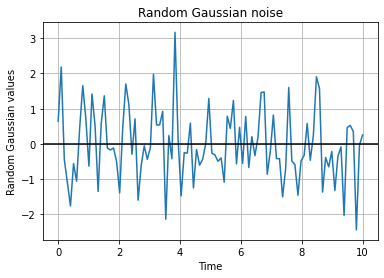

In [215]:
from matplotlib.cm import datad
#define function to generate Gaussian noise
def noise(time, scale, centre = 0):
  dat = []
  for i in time:
    dat.append(np.random.normal(loc = centre, scale = 1.0, size = None))
  return dat
#check function creates same number of points as time array
n = noise(t, 1)
print(len(n))
print(len(t))
#plot function
plt.plot(t,n)
plt.title('Random Gaussian noise')
plt.xlabel('Time')
plt.ylabel('Random Gaussian values')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

3. [2] Putting things together, create a function with the following call signature:
   
   ```python
   gen_data(t,signal,sigma_noise=1)
   ```
   Which returns the sum of the signal and noise generated with `sigma_noise` as its standard deviation, using the functions you wrote in question 1) and in question 2). Plot the result  few times (i.e. for a few different random noises), with the reference signal.

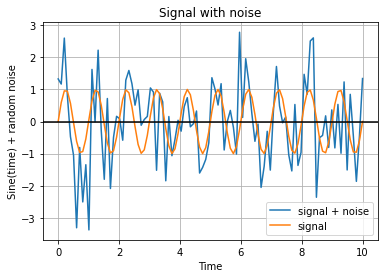

In [218]:
#define function
def gen_data(t,signal,sigma_noise = 1):
  return np.add(signal, noise(t, scale = sigma_noise))

#plot noisy signal and reference signal
plt.plot(t, gen_data(t,f), label = 'signal + noise')
plt.plot(t, f, label = 'signal')
plt.title('Signal with noise')
plt.xlabel('Time')
plt.ylabel('Sine(time) + random noise')
plt.legend()
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

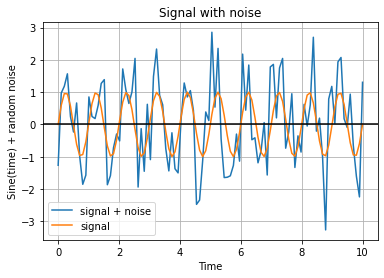

In [219]:
#plot noisy signal and reference signal
plt.plot(t, gen_data(t,f), label = 'signal + noise')
plt.plot(t, f, label = 'signal')
plt.title('Signal with noise')
plt.xlabel('Time')
plt.ylabel('Sine(time) + random noise')
plt.legend()
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()


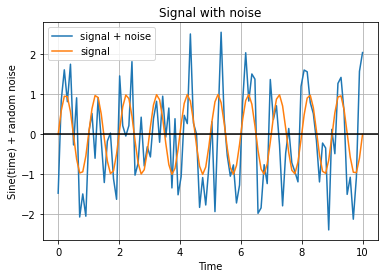

In [220]:
#plot noisy signal and reference signal
plt.plot(t, gen_data(t,f), label = 'signal + noise')
plt.plot(t, f, label = 'signal')
plt.title('Signal with noise')
plt.xlabel('Time')
plt.ylabel('Sine(time) + random noise')
plt.legend()
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

4. [4] We will now run `curve_fit()` on the data we created, and see how well we can recover our reference signal. Create some data by using `gen_data()` to generate data with our reference signal added to random Gaussian noise of unit standard deviation.

    First, plot this data with the reference signal and a fitting signal from your sinusoid function from Exercise 1 that is a bit offset from the true signal values.

    Then, run `curve_fit()` on the data with the signal model. Plot and print the result.

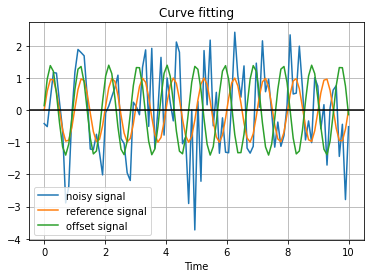

In [221]:
#import curvet_fit()
from scipy.optimize import curve_fit
#define noisy data array
data = gen_data(t,f)
plt.plot(t, data, label = 'noisy signal')
plt.plot(t, f, label = 'reference signal')
plt.plot(t, sine_wave(t, amplitude = 1.4, frequency = 1.05, phase = 0.1), label = 'offset signal')
plt.legend()
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.title('Curve fitting')
plt.xlabel('Time')
plt.show()

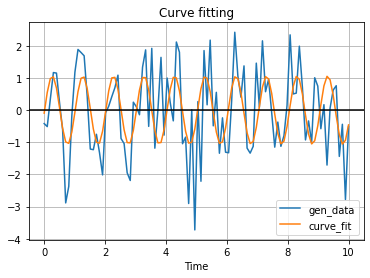

In [222]:
popt, pcov = curve_fit(sine_wave, t, data)
plt.plot(t, data, label = 'gen_data')
plt.plot(t, sine_wave(t, *popt), label = 'curve_fit')
plt.title('Curve fitting')
plt.xlabel('Time')
#plt.ylabel('Sine(time) + random noise')
plt.legend()
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

5. [2] From the amplitude $a$ of the signal and its frequency $f$, we can compute the quantity:
$\frac{a}{f^2}$. Which, if we can find out the distance between us and the Neutron Star at the source of this signal, is a useful quantity to infer the star's mass quadrupole moment (and its moment of inertia).

    Use the `uncertainties` package to propagate the uncertainties measured by `curve_fit()` into the uncertainties for $\frac{a}{f^2}$.

In [223]:
! pip install -q uncertainties

In [224]:
#import uncertainties
import uncertainties as uc
import uncertainties.umath as umath

#define quantity
def quantity(a, f):
  return a/f**2

#define values and uncertainties
amp = popt[0]
freq = popt[1]
delta_amp = np.sqrt(pcov.diagonal()[0])
delta_freq = np.sqrt(pcov.diagonal()[1])
amplitude = uc.ufloat(amp, delta_amp)
frequency = uc.ufloat(freq, delta_freq)

#print value of quantity and its uncertainty
print(quantity(amplitude, frequency))
print('The uncertainty of a/f^2 is:', quantity(amplitude, frequency).std_dev)

1.08+/-0.16
The uncertainty of a/f^2 is: 0.1562422578135351


6. [4] Repeat the process above (create noise, create data=signal+noise, fit the data) with different `sigma_noise` values. Try to see what values are reached before the uncertainty of the fit obtained with `curve_fit()` becomes very large. Illustrate this with an animation, choosing appropriate values.

In [225]:
# Creating an empty figure
fig = plt.figure()
ax = plt.axes()

# Initialisation of the plot element `line` as empty:
line1, = ax.plot([],label='data',color='red')
line2, = ax.plot([],label='data',color='blue')
# We could in general have more than one plot element.

x=t

# Setting axes so they don't move from frame to frame
ax.set_xlim(0,10)
ax.set_ylim(-3,3)

# The anination function, which gets run for each frame, with a 
# different frame number. It has to accept as input a single 
# frame number, and replace the data for each frame number
def animate(frame_num):
    
    # This function updated the data of the line element.
    # In this example we have a sine wave, but this could
    # be anything that depends on the frame number.
    signal = sine_wave(t, amplitude=1, frequency=1, phase=0)
    data = gen_data(t,signal,sigma_noise=frame_num)
    popt, pcov = curve_fit(sine_wave, t, data)
    line1.set_data(t, sine_wave(t, *popt))
    line2.set_data(t, data)
    return line1, line2

# Animation function, for `frames` number of frame, with `interval` ms
# between frames.
anim=FuncAnimation(fig,animate,frames=100, interval=33)     

# And display
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close() 

In [226]:
for i in np.linspace(0,3,10):
    signal = sine_wave(t, amplitude=1, frequency=1, phase=0)
    data = gen_data(t,signal,sigma_noise=i)
    popt, pcov = curve_fit(sine_wave, t, data)
    unc = quantity(uc.ufloat(popt[0], np.sqrt(pcov.diagonal()[0])), uc.ufloat(popt[1], np.sqrt(pcov.diagonal()[1]))).std_dev
    print('the uncertainty of the fit for sigma_noise = ', i, 'is: ', unc)

the uncertainty of the fit for sigma_noise =  0.0 is:  0.13872952374004796
the uncertainty of the fit for sigma_noise =  0.3333333333333333 is:  0.1515068883162407
the uncertainty of the fit for sigma_noise =  0.6666666666666666 is:  0.1472010865623583
the uncertainty of the fit for sigma_noise =  1.0 is:  0.14682711629080275
the uncertainty of the fit for sigma_noise =  1.3333333333333333 is:  0.1508462756624139
the uncertainty of the fit for sigma_noise =  1.6666666666666665 is:  0.13828635340504472
the uncertainty of the fit for sigma_noise =  2.0 is:  0.13788458053136615
the uncertainty of the fit for sigma_noise =  2.333333333333333 is:  0.1383011647886264
the uncertainty of the fit for sigma_noise =  2.6666666666666665 is:  0.15054258477547666
the uncertainty of the fit for sigma_noise =  3.0 is:  0.15794752662407957


## Exercise 2

Gravitational waves have two polarisations, usually called $h_+(t)$ and $h_{\times}(t)$. Is is convenient to write a gravitational wave as a complex time series $h(t)=h_+(t)+ih_{\times}(t)$, with the polarisation angle then the argument of the complex numbers.

1. [1] Write a function that, from an amplitude $A$, a frequency $f$ and a phase $\phi$ generates the complex time series:

$$
h(t)=A\,\exp(i(2\pi f t + \phi))
$$

In [267]:
def grav_wave(time, A, f, phi):
  A*np.exp(1j*(2*np.pi*f*time+phi))
data1 = grav_wave(t,1,1,0)
print(data1)


None


In [247]:
h = 1*np.exp(1j*(2*np.pi*1*t+0))

[ 1.          0.80527026  0.29692038 -0.32706796 -0.82367658 -0.99949654
 -0.78605309 -0.26647381  0.35688622  0.84125353  0.99798668  0.76604444
  0.23575894 -0.38634513 -0.85798341 -0.99547192 -0.74526445 -0.20480667
  0.41541501  0.87384938  0.99195481  0.72373404  0.17364818 -0.44406661
 -0.88883545 -0.98743889 -0.70147489 -0.14231484  0.47227107  0.90292654
  0.9819287   0.67850941  0.1108382  -0.5        -0.91610846 -0.97542979
 -0.65486073 -0.07924996  0.52722547  0.92836793  0.9679487   0.63055267
  0.04758192 -0.55392006 -0.93969262 -0.95949297 -0.60560969 -0.01586596
  0.58005691  0.95007112  0.95007112  0.58005691 -0.01586596 -0.60560969
 -0.95949297 -0.93969262 -0.55392006  0.04758192  0.63055267  0.9679487
  0.92836793  0.52722547 -0.07924996 -0.65486073 -0.97542979 -0.91610846
 -0.5         0.1108382   0.67850941  0.9819287   0.90292654  0.47227107
 -0.14231484 -0.70147489 -0.98743889 -0.88883545 -0.44406661  0.17364818
  0.72373404  0.99195481  0.87384938  0.41541501 -0.

2. [1] Make a 3D plot of that function for $A=1,f=1,\phi=0$, using the axes $(\text{Real}(h(t)),\text{Imag}(h(t)),t)$. To make a 3D plot, of, say, the arrays `x`, `y` and `z` you can use:

```python
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z)
```

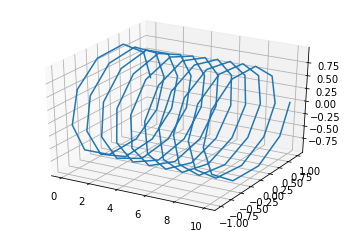

In [250]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot3D(t, h.real, h.imag)

3. [2] Create an animation of the plot by varying the phase. You have to make the animation code from above work with a 3D figure. You can replace `line.set_data()` with `line.set_data_3d()`.

In [276]:
# Creating an empty figure
fig = plt.figure()
ax.plot3D(t, h.real, h.imag)

# Initialisation of the plot element `line` as empty:
line, = ax.plot3D([], [], [], label='data',color='red')
# We could in general have more than one plot element.

x=np.linspace(0,2*np.pi,100)

# Setting axes so they don't move from frame to frame
ax.set_xlim(0,2*np.pi)
ax.set_ylim(0,10)
ax.set_zlim(-1,1)

# The anination function, which gets run for each frame, with a 
# different frame number. It has to accept as input a single 
# frame number, and replace the data for each frame number
def animate(frame_num):
    
    # This function updated the data of the line element.
    # In this example we have a sine wave, but this could
    # be anything that depends on the frame number.
    h = 1*np.exp(1j*(2*np.pi*1*x+frame_num/100))
    line.set_data_3d(x, h.real, h.imag)
    return line

# Animation function, for `frames` number of frame, with `interval` ms
# between frames.
anim=FuncAnimation(fig,animate,frames=100, interval=20)     

# And display
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close() 

## Exercise 0

[0] When we know the data we are trying to fit with `curve_fit()` is more noisy in some places, we can use [`curve_fit()`'s weighted least squares fitting](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). To illustrate this, create a fitting function for a [Lorentzian line shape function](https://en.wikipedia.org/wiki/Spectral_line_shape#Lorentzian). This is often used in gravitational-wave detectors to model lines in the noise spectrum.

$$
line(f)=\frac{A\,\gamma^2}{\gamma^2+(f-f_0)^2}
$$

Over a frequency array from 1 to 20 and at least 100 frequencies, generate:
- a Lorentzian signal with $A=3,\gamma=5,f_0=12$ (arbitrary units)
- Gaussian noise with a standard deviation of $1$ everywhere except for a window from $f=10$ to $f=14$ where the noise is higher, with a standard deviation of $5$.
- perform the fit with and without weights (the `sigma` argument in `curve_fit()`), running the program until you see a good illustation of weighted least squares fitting.

(this exercise is for demonstration purposes and won't be marked)